In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v1', desc=["SFFF", "FHFH", "FFFH", "HFFG"])


In [3]:
#Initialize table with all zeros
# Set learning parameters
lr = .8
y = .95
trn_episodes = 2000
tst_episodes = 100
Q = np.zeros([trn_episodes, env.observation_space.n,env.action_space.n])
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
tstRlist = []
temp = Q[0,:,:]
for i in range(trn_episodes):
    #Reset environment and get first new observation
    Q[i,:,:] = temp

    s, _ = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[i,s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_, _ = env.step(a)
        #Update Q-Table with new knowledge
        Q[i,s,a] = Q[i,s,a] + lr*(r + y*np.max(Q[i,s1,:]) - Q[i,s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)
    temp = Q[i,:,:]
for i in range(tst_episodes):
    s, _ = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    gamma_step = 1
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[i,s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_, _ = env.step(a)
        #Update Q-Table with new knowledge
        rAll += gamma_step * r
        gamma_step *= y
        s = s1
        if d == True:
            break
    #jList.append(j)
    tstRlist.append(rAll)
    temp = Q[i,:,:]

/Users/Hunter/opt/anaconda3/envs/RL/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
print ("Score over time: " +  str(sum(tstRlist)/tst_episodes))


Score over time: 0.01167537031514838


In [6]:
Q.shape

(2000, 16, 4)

In [7]:
print ("Final Q-Table Values")
print (Q[-1,:,:])

Final Q-Table Values
[[2.01563740e-01 1.36326535e-02 1.47767857e-02 8.30485161e-03]
 [6.71139427e-03 1.66779556e-03 2.94987070e-03 2.77825369e-01]
 [8.20481326e-03 2.01598317e-01 7.04784871e-03 8.28426819e-03]
 [0.00000000e+00 2.50427763e-04 3.11447223e-04 5.65739390e-02]
 [2.09742861e-01 2.38483634e-03 3.27166792e-04 2.51601251e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.02176130e-02 2.21426503e-04 1.84219544e-05 6.88509220e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.19967429e-05 5.39452256e-04 8.98542198e-05 4.22577708e-01]
 [0.00000000e+00 2.51875291e-01 7.54148027e-03 0.00000000e+00]
 [9.92492701e-02 0.00000000e+00 1.23042211e-04 1.69686076e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.79656329e-03 0.00000000e+00 6.96061189e-01 8.76215340e-03]
 [0.00000000e+00 9.83091585e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

In [8]:
import matplotlib.pyplot as plt


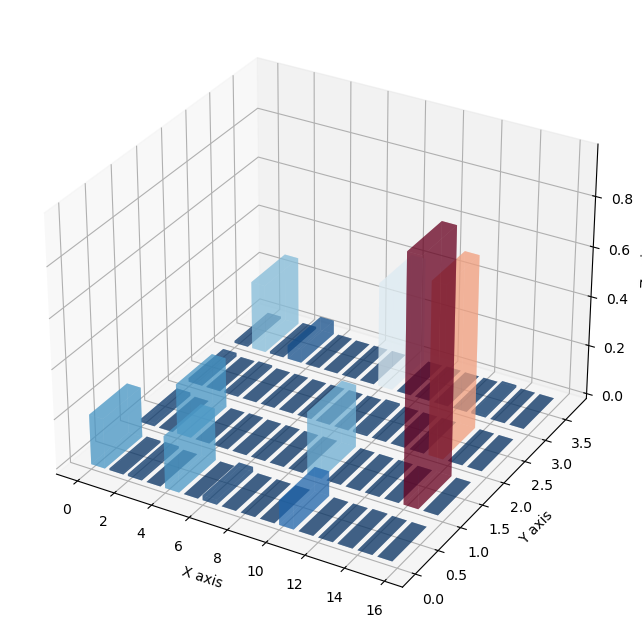

In [9]:
def plot_3d_bars_transparent(dim, matrix):
    """Plot a 2D matrix as bars in a 3D space using semi-transparent colors."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    n, m = matrix.shape
    x, y = np.meshgrid(np.arange(n), np.arange(m), indexing="ij")

    # Flatten arrays for bar3d
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)
    dx = dy = 0.75  # width of the bars
    dz = matrix.flatten()
    
    # Determine colors based on matrix values
    norm = plt.Normalize(dz.min(), dz.max())
    colors = plt.cm.RdBu_r(norm(dz))
    colors[..., -1] = 0.5  # Set alpha to 0.5 for all bars

    ax.bar3d(x, y, z, dx, dy, dz, shade=False, color=colors)

    # Set axis labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.show()

# Plot the 2D numpy array using the modified function
plot_3d_bars_transparent(2, Q[-1,:,:])

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import PillowWriter

def update(num, dim, matrix, ax):
    """Update the plot for new time step."""
    ax.cla()  # Clear previous plot
    n, m = matrix.shape[1:]
    x, y = np.meshgrid(np.arange(n), np.arange(m), indexing="ij")

    # Flatten arrays for bar3d
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)
    dx = dy = 0.75  # width of the bars
    dz = matrix[num].flatten()

    # Determine colors based on matrix values
    norm = plt.Normalize(matrix.min(), matrix.max())
    colors = plt.cm.RdBu_r(norm(dz))
    colors[..., -1] = 0.5  # Set alpha to 0.5 for all bars

    ax.bar3d(x, y, z, dx, dy, dz, shade=False, color=colors)

    # Set axis labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

def plot_3d_bars_transparent_timeseries(dim, matrix):
    """Plot a 3D matrix as bars in a 3D space using semi-transparent colors over time."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ani = animation.FuncAnimation(fig, update, frames=len(matrix), fargs=(dim, matrix, ax))

    # Save the animation as a GIF file
    ani.save('matrix_evolution.gif', writer=PillowWriter(fps=2))
    plt.close(fig)  # Close the figure window

# Assuming Q is your 3D matrix
plot_3d_bars_transparent_timeseries(2, Q)


In [10]:
import gym
import numpy as np
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
%matplotlib inline

2023-09-26 09:28:28.498035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


In [18]:
env = gym.make('FrozenLake-v1',desc=["SFFF", "FHFH", "FFFH", "HFFG"])
tf.reset_default_graph()


In [19]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [27]:
init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()[0]
        # print(s)
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a, allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_, _ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print ("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.426%


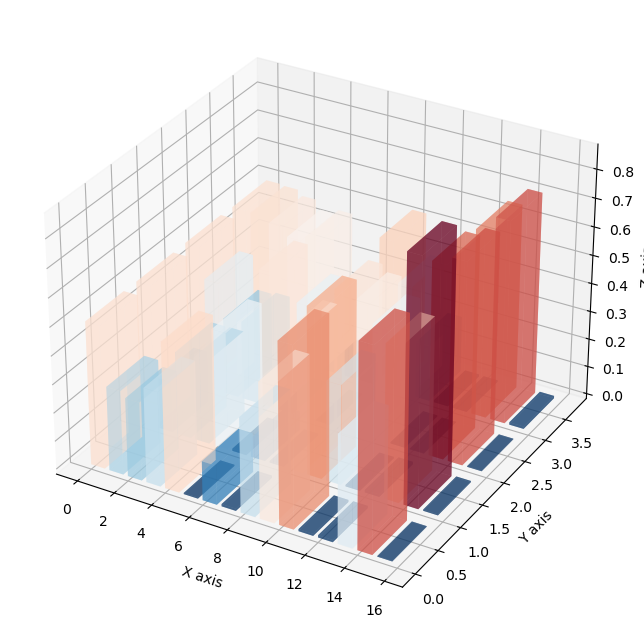

In [35]:
plot_3d_bars_transparent(2, W1)

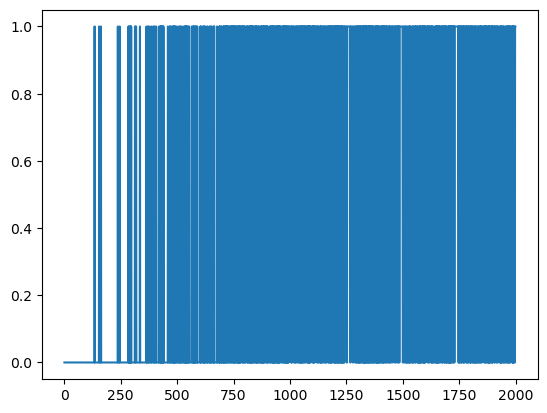

In [28]:
plt.plot(rList)


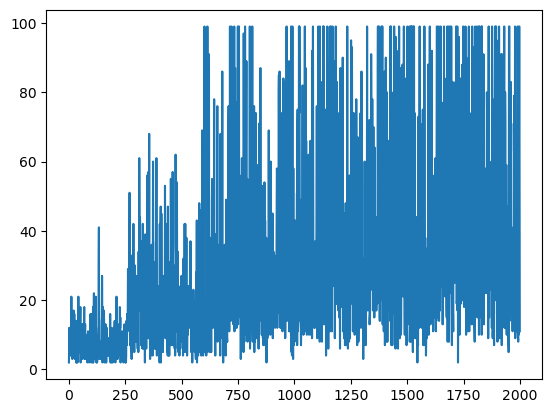

In [29]:
plt.plot(jList)